# Notebook for Final Project

## Package Import

In [1]:
# Basic
import numpy as np # linear algebra
import scipy as sp
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration and Preprocessing

Read data and look at the variables we have

In [2]:
# Import Data
df = pd.read_json("../data/train.json")

In [3]:
print df.shape

(49352, 15)


In [4]:
# Look at the first few rows
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


## Split Training Set and Test Set

We are spliting the available data into training set and test set

In [5]:
df_y = df[['price']]
df_X = df.drop('price',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(39481, 14) (9871, 14) (39481, 1) (9871, 1)


## Training Data Manipulation

From now on, we use the training data for modeling and validation.

Select Numeric Data

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_train_numeric = X_train.select_dtypes(include=numerics)
X_train_numeric.head()

,bathrooms,bedrooms,latitude,listing_id,longitude
100514,1.0,2,40.7080,6861664,-74.0149
42844,1.0,1,40.7289,7115500,-74.0029
37508,1.0,0,40.7347,7153691,-74.0013
70450,1.0,0,40.7911,6996200,-73.9735
110961,2.0,2,40.7592,6862280,-73.9948


Select Text Data

In [8]:
X_train_string = X_train.select_dtypes(include=['object'])
X_train_string.head()

,building_id,created,description,display_address,features,interest_level,manager_id,photos,street_address
100514,bb8658a3e432fb62a440615333376345,2016-04-12 06:01:01,Building Characteristics:Twenty-four hour conc...,Washington Place,"[Doorman, Fitness Center, Laundry in Unit, Dis...",low,92aa3b535f48ec05903a3b7fcdafd411,[https://photos.renthop.com/2/6861664_28951e60...,90 Washington Place
42844,5855d5dfcaca9da6cacb1f389fd383bd,2016-06-06 02:52:14,Perfect for NYU StudentsGreat 1 bedroom in PRI...,West Houston,[Hardwood Floors],low,aea47aba66a01cf236746e209c2b7f88,[https://photos.renthop.com/2/7115500_ac16766c...,176 West Houston
37508,0,2016-06-13 01:18:15,This apartment is located in a walk up buildin...,Waverly Place,"[Fireplace, Pre-War, Dogs Allowed, Cats Allowed]",low,8b53ccf4338806ab1be3dd0267711649,[https://photos.renthop.com/2/7153691_ceaef03e...,189 Waverly Place
70450,b491b11c7eafd39aabdb9a9f0acf88b8,2016-05-11 05:29:34,Spacious Studio in a Full Service BLDGApartmen...,West 91st Street,"[Roof Deck, Doorman, Laundry in Building, High...",low,8600370dac7555a25d417e7f2dab6d1b,[https://photos.renthop.com/2/6996200_be863639...,212 West 91st Street
110961,0,2016-04-12 06:19:32,"Located in prime Midtown West/Clinton area, co...",West 42nd Street,"[Swimming Pool, Roof Deck, Dining Room, Doorma...",low,8262449f40e9117f7a9ea49b4a333993,[https://photos.renthop.com/2/6862280_c9d26202...,450 West 42nd Street


## Feature Extraction

Here we can create some new features derived from original features

## Construct X and y

In [10]:
X = X_train_numeric.values # Use numeric data as features
y = y_train.values # Target Variable: price
print X.shape, y.shape

(39481, 5) (39481, 1)


## Feature Selection

To select numeric features, we have several choices:
1. Embeded Method: We can use some linear models penalized with the L1 norm to make unimportant features has coefficient of zero.
2. Filter Method: Preprocess the features by using F-test, Correlation Matrix, etc.
3. Wrapper Method: Run model on subsets and score them

I've tried the RFECV method, but takes too much time

In [12]:
# Embeded Method: Lasso 
# Reference: Wikipedia-Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
estimator = Lasso()
estimator.fit(X,y)
selector = SelectFromModel(estimator, prefit=True, threshold=0.25)
X_new = selector.transform(X)
# n_features indicates the number of features we want
n_features = X_new.shape[1]
while n_features > 2:
    selector.threshold += 0.1
    X_new = selector.transform(X)
    n_features = X_new.shape[1]
print X_new.shape
print selector.get_support() # We can see that only the first two features "bedroom", "bathroom" remains

(39481, 2)
[ True  True False False False]


# Modeling

### Simplest Model: Linear Regression with L1-Regularization

In [85]:
# Import models
ls =Lasso(alpha=0.1)
ls.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Cross Validation

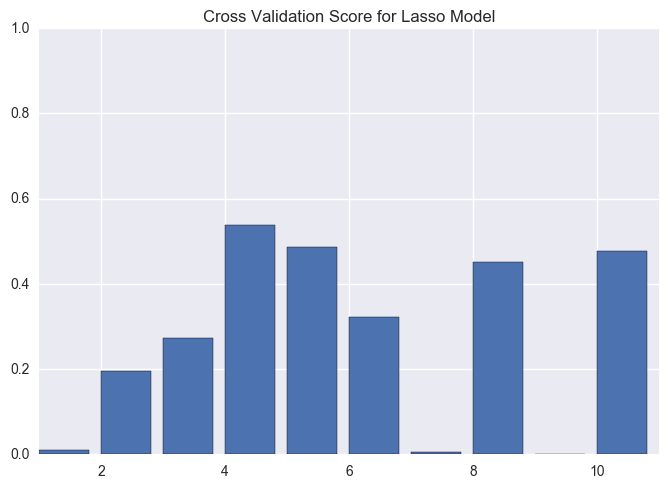

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ls, X, y, cv=10)
plt.bar(np.arange(1,11), scores)
plt.title('Cross Validation Score for Lasso Model')
plt.xlim(1,11)
plt.ylim(0,1)
plt.show()

The performance of this model is very ugly because we haven't do any model selection and feature engineering

## Evaluation

## Deployment